# Capacities and potentials

This example notebook shows how voltage cut-offs and initial lithium concentrations impact the capacities and potentials of the cell. Also, different input options are shown;

1. how to input stoichiometry limits instead of voltage cut-offs
2. how to input average potentials and gravimetric active material capacities instead of potential curves and concentrations.

The simplist way to create a TEA class is to start with a PyBaMM parameter-set and add/update values with an input parameter-set. A good overview of variables about capacities and potentials can be found in the capacities and potentials dataframe.

In [1]:
# %pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
# !pip install git+https://github.com/pybamm-team/pybamm-tea.git # install PyBaMM-TEA if it is not installed
import pybamm
import pybamm_tea
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# input parameter-set
input = {
    # add electrolyte density
    "Electrolyte density [kg.m-3]": 1276
}

# base parameter-sets
base = pybamm.ParameterValues("Chen2020")

# create a TEA class
tea_class = pybamm_tea.TEA(base, input)

# get the stack energy
display(tea_class.stack_energy_dataframe)

# get the mass and volume loadings as a dataframe
tea_class.capacities_and_potentials_dataframe

C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:187: UserWarning: 'Negative electrode active material density [kg.m-3]' and 'Negative electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Negative electrode porosity' and 'Negative electrode density [kg.m-3]'
  warnings.warn(
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:187: UserWarning: 'Positive electrode active material density [kg.m-3]' and 'Positive electrode dry density [kg.m-3]' have been calculated from; 'Electrolyte density [kg.m-3]', 'Positive electrode porosity' and 'Positive electrode density [kg.m-3]'
  warnings.warn(
C:\Users\Julian\Documents\GitHub\pybamm-tea\pybamm_tea\tea.py:430: UserWarning: 'Initial loss of lithium inventory' is set to 0.
  warnings.warn("'Initial loss of lithium inventory' is set to 0.")


,Parameter,Unit,Value
0,Volumetric stack energy,W.h.L-1,997.596702
1,Gravimetric stack energy,W.h.kg-1,398.264666
2,Areal stack energy,W.h.m-2,186.351064
3,Stack average OCP,V,3.713903
4,Capacity,mA.h.cm-2,5.017660
5,Stack thickness,um,186.800000
6,Stack density,kg.L-1,2.504859


,Parameter,Unit,Value
0,Stack average OCP,V,3.713903
1,Minimal OCP,V,2.500043
2,Maximal OCP,V,4.199987
3,Negative electrode average OCP,V,0.193702
4,Positive electrode average OCP,V,3.907606
5,Practical n/p ratio,-,1.101087
6,Theoretical n/p ratio,-,0.667362
7,Volumetric stack capacity,A.h.L-1,268.611371
8,Gravimetric stack capacity,A.h.kg-1,107.236138
9,Capacity,mA.h.cm-2,5.017660


### What can be seen in the dataframe?

The dataframe shows the the stack average OCP at the top. The stack average OCP is calculated as the difference between the positive electrode average OCP and the negative electrode average OCP. The minimal and maximal voltages of the stack OCP are limited by the voltage cut-offs, to which the stoichiometries at 0% and 100% SoC refer.

Below, the OCP's of the active materials are plotted against the stoichiometry (degree of lithiation) and together with the stack OCP against the SoC.

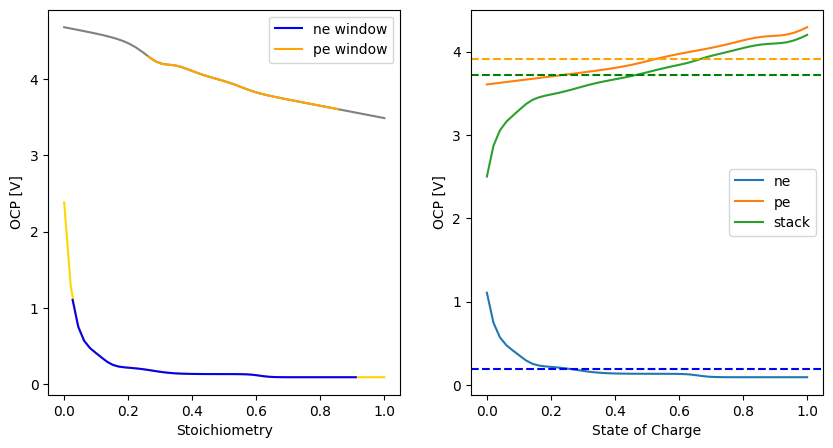

In [3]:
# get the OCP functions
U_n = tea_class.parameter_values.get("Negative electrode OCP [V]")
U_p = tea_class.parameter_values.get("Positive electrode OCP [V]")

# get the stoichiometries at 0% and 100% SoC
x0 = tea_class.stack_energy.get("Negative electrode stoichiometry at 0% SoC")
x100 = tea_class.stack_energy.get("Negative electrode stoichiometry at 100% SoC")
y0 = tea_class.stack_energy.get("Positive electrode stoichiometry at 0% SoC")
y100 = tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC")

# create vectors of stoichiometries
soc = pybamm.linspace(0, 1)
x = x0 + soc * (x100 - x0)
y = y0 - soc * (y0 - y100)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the positive and negative active material OCP's and the utilised OCP vs. the stoichiometry
axs[0].plot(soc.entries, U_n(soc).entries, color="gold")
axs[0].plot(x.entries, U_n(x).entries, color="blue", label="ne window")
axs[0].plot(soc.entries, U_p(soc).entries, color="gray")
axs[0].plot(y.entries, U_p(y).entries, color="orange", label="pe window")
axs[0].set_xlabel("Stoichiometry")
axs[0].set_ylabel("OCP [V]")
axs[0].legend()

# plot the positive and negative utilised OCP's vs. the state of charge
axs[1].plot(soc.entries, U_n(x).entries, label="ne")
axs[1].plot(soc.entries, U_p(y).entries, label="pe")
axs[1].plot(soc.entries, U_p(y).entries - U_n(x).entries, label='stack')
axs[1].set_xlabel("State of Charge")
axs[1].set_ylabel("OCP [V]")
axs[1].legend()

# add horizontal lines with mean OCP's
axs[1].axhline(U_n(x).entries.mean(), color="blue", linestyle="--")
axs[1].axhline(U_p(y).entries.mean(), color="orange", linestyle="--")
axs[1].axhline((U_p(y).entries - U_n(x).entries).mean(), color="green", linestyle="--")

plt.show()

### n/p ratio's and voltage cut-off's

When limiting the upper voltage cut-off, the practical n/p ratio changes according to the changing stoichiometry limits at 100% SoC. The practical n/p ratio refers to the ratio of the concentration from a stoichiometry range between the theoretical maximal stoichiometry at 100% _lithiation_ and the stoichiometry at 0% _SoC_ for the negative electrode and between 0% and 100% _SoC_ for the positive electrode. It relates to the theoretical n/p ratio with the ratio of the above stoichiometric windows. The theoretical n/p ratio considers the theoretical maximal lithium concentrations between 0% and 100% _lithiation_ in the active materials and the active material volume fraction and electrode thickness.

\begin{equation*}
\begin{aligned}
& n / p_{\text {theoretical }}=\frac{C_{\text {max }}^{-} v_{\text {active }}^{-} t^{-}}{C_{\max }^{+} v_{\text {active }}^{+} t^{+}} \\
& n / p_{\text {practical }}=\frac{(1-x 0)}{(y 0-y 100)} n / p_{\text {theoretical }}
\end{aligned}
\end{equation*}

Let's see how gravimetric and volumetric stack energy, the practical n/p ratio and the stoichiometries at 100% change with upper voltage cut-off.

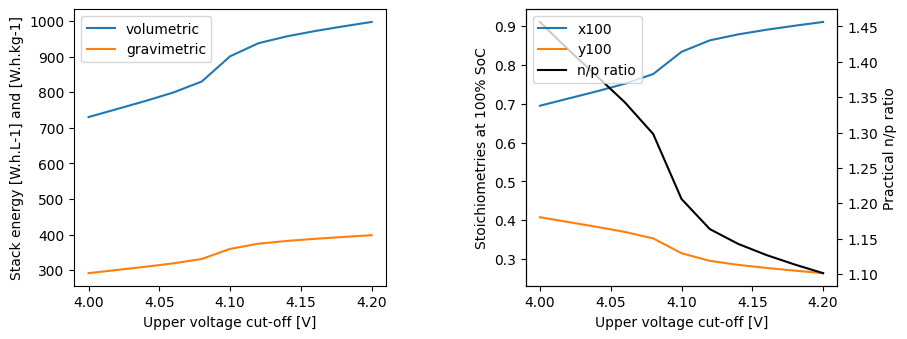

In [4]:
# generate an array of upper voltage cut-offs to loop over
upper_cut_off_potentials = np.linspace(4, 4.2, 11)

# initialize lists for the stack energy densities
stack_volumetric_energy = []
stack_gravimetric_energy = []
n_p_ratios = []
x100s = []
y100s = []

# loop over the potentials and calculate the stack energy densities
for potential in upper_cut_off_potentials:
    # update the upper voltage cut-off in the input
    input.update({"Upper voltage cut-off [V]": potential})
    
    # create a TEA classes with the updated input
    tea_class = pybamm_tea.TEA(base, input)

    # save the calculated the stack energy densities in the lists
    stack_volumetric_energy.append(tea_class.stack_energy.get("Volumetric stack energy [W.h.L-1]"))
    stack_gravimetric_energy.append(tea_class.stack_energy.get("Gravimetric stack energy [W.h.kg-1]"))
    n_p_ratios.append(tea_class.stack_energy.get("Practical n/p ratio"))
    
    x100s.append(tea_class.stack_energy.get("Negative electrode stoichiometry at 100% SoC"))
    y100s.append(tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC"))

# set up the figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=7.0)

# plot stack energy and n/p ratio vs. the upper voltage cut-off
axs[0].plot(upper_cut_off_potentials, stack_volumetric_energy, label="volumetric")
axs[0].plot(upper_cut_off_potentials, stack_gravimetric_energy, label="gravimetric")
axs[0].set_xlabel("Upper voltage cut-off [V]")
axs[0].set_ylabel("Stack energy [W.h.L-1] and [W.h.kg-1]")
axs[0].legend()

# plot the stoichiometries vs the upper voltage cut-off
axs[1].plot(upper_cut_off_potentials, x100s, label="x100")
axs[1].plot(upper_cut_off_potentials, y100s, label="y100")
axs[1].set_xlabel("Upper voltage cut-off [V]")
axs[1].set_ylabel("Stoichiometries at 100% SoC")
ax_ = axs[1].twinx()
ax_.plot(upper_cut_off_potentials, n_p_ratios, color="black", label="n/p ratio")
ax_.set_ylabel("Practical n/p ratio", color="black")
ax_.tick_params(axis='y', labelcolor="black")
lines, labels = axs[1].get_legend_handles_labels()
lines_, labels_ = ax_.get_legend_handles_labels()
ax_.legend(lines + lines_, labels + labels_, loc='upper left')

plt.show()

### Constant half-cell potentials 

Typically, the open circuit potential is depending on the concentration of lithium inside the active material. Thus, the OCV function of the _stoichiometry_ ([0,1]) is coupled with the set maximal concentration at 100% lithiation.

If only the average half-cell potential is of interest or the OCV curve is constant, one can just set the OCP function to a constant. Alternatively, for the energy calculation one can also set the average half-cell OCPs or the average stack OCP to a given value.

In [5]:
def ocp_function(variables):
    return pybamm.Scalar(0)

potential = {
    "Negative electrode OCP [V]": ocp_function,
    # "Negative electrode average OCP [V]": 0, # set the average OCP to 0 V
    # "Stack average OCP [V]": 3.5, # set the average OCP to 3.5 V
}

### Stoichiometry limits 

In case both half-cell potentials are constant, the capacity balancing cannot be done based on voltage cut-offs, instead the stoichiometry range for one electrode needs to be set. The stoichiometry limits can also be set for one OCP curve, then the lower and upper voltage cut-offs are updated.

In [6]:
stoichiometries = {
    # set the stoichiometries at 0% and 100% SoC
    "Positive electrode stoichiometry at 0% SoC": tea_class.stack_energy.get("Positive electrode stoichiometry at 0% SoC"),
    "Positive electrode stoichiometry at 100% SoC": tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC"),
}

### Gravimetric capacities 

Besides maximum concentrations, one can also input theoretical gravimetric capacities, which can be calculated from molar masses. Then also active material densities are required inputs and the maximum concentrations are updated.

In the special case of a delithiated metal electrode, one can set the active material capacity/concentration to a very high value, so that its capacity is not limiting, even if the electrode thickness would converge to zero.

When setting maximum concentrations, also initial concentrations (in both electrodes) should be set.

In [7]:
lithiated_capacity = {
    # calculate the capacity of lithium as: F [Q.mol-1] / 3600 [Q.Ah-1] / M_n(for one mol electrons) [g.mol-1] * 1000 [g.kg-1]
    "Negative electrode active material capacity [A.h.kg-1]": 96485 / 3.6 / 6.941,
    "Negative electrode active material density [kg.m-3]": 534,    
    "Initial concentration in negative electrode [mol.m-3]": 534000 / 6.941, # the maximum concentration [g.m-3] / [g.mol-1]
    "Initial concentration in positive electrode [mol.m-3]": tea_class.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]") *
                                                            tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC"),
}
delithiated_capacity = {
    "Maximum concentration in negative electrode [mol.m-3]": 1e100,
    "Negative electrode active material density [kg.m-3]": 534,
    "Initial concentration in negative electrode [mol.m-3]": 0,
    "Initial concentration in positive electrode [mol.m-3]": tea_class.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]") # *
                                                          #  tea_class.stack_energy.get("Initial lithium inventory / positive electrode theoretical capacity"),
}

### Thickness - n/p ratio

The thickness of an electrode can be calculated based on the theoretical n/p ratio, as below.

\begin{equation*}
t^{-}=\frac{n / p_{\text {theoretical }} C_{\text {max }}^{+} v_{\text {active }}^{+} t^{+}}{C_{\text {max }}^{-} v_{\text {active }}^{-}}
\end{equation*}

If both thicknesses or only the positive thickness and the n/p are given, the negative electrode thickness is updated.
If only the negative thickness and the n/p ratio are given, the positive electrode thickness is calculated.

Also when updating a thickness, the initial concentrations should be updated. By setting both initial concentrations to None, the initial concentration in the negative electrode are set to zero and to the maximum in the positive electrode with respect to initial losses of lithium, as is shown at the end of the notebook.

In [8]:
thickness_npratio = {
    "Theoretical n/p ratio": 1,
    "Negative electrode thickness [m]": None,
    "Negative electrode active material volume fraction": 1,
    "Negative electrode porosity": 0,
}

### Thickness - lithium metal

Alternatively, the thickness of a lithiated metal electrode can be calculated from the difference of the initial and delithiated amount of lithium in the positive electrode. When considering the lithiated metal-electrode, either the density of the negative active material needs to be set to zero or the positive active material density needs to be reduced by the amount of lithium which is transferred to the negative electrode.

\begin{equation*}
t_{\text {lithiated }}^{-}=\frac{\left(y_{initial}-y_{100}\right) n_{\text {th. max }}^{+} M_{L i}}{F \rho_{L i}}
\end{equation*}

\begin{equation*}
\rho_{\text {active, delithiated }}^{+}=\rho_{\text {active, lithiated }}^{+}-M_{L i} C_{\max }^{+}\left(y_{initial}-y_{100}\right)
\end{equation*}

In [9]:
lithiated_thickness = {
    "Negative electrode active material volume fraction": 1,
    "Negative electrode porosity": 0,
    "Negative electrode thickness [m]": ((tea_class.stack_energy.get("Initial lithium inventory / positive electrode theoretical capacity")-
                                          tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC"))*
                                         tea_class.stack_energy.get("Positive electrode theoretical capacity [mA.h.cm-2]")*
                                         6.941 / 0.534 / 96485 * 3.6 / 100), # mA.h.cm-2 * g.mol-1 / g.cm-3 / Q.mol-1 * Q.mA.h-1 / cm.m-1 = m
    "Positive electrode active material density [kg.m-3]": (tea_class.parameter_values.get("Positive electrode active material density [kg.m-3]")-
                                                            0.006941 * tea_class.parameter_values.get("Maximum concentration in positive electrode [mol.m-3]") *
                                                            (tea_class.stack_energy.get("Initial lithium inventory / positive electrode theoretical capacity") -
                                                              tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC")))
}

Let's now compare how potentials and capacities vary, when replacing a negative electrode with a lithiated or a delithiated metal electrode.

In [10]:
# merge input data
input_lithium_discharged = {**potential, **stoichiometries, **delithiated_capacity, **thickness_npratio}
input_lithium_charged = {**potential, **stoichiometries, **lithiated_capacity, **lithiated_thickness}
# add electrolyte density
input_lithium_discharged["Electrolyte density [kg.m-3]"] = 1276
input_lithium_charged["Electrolyte density [kg.m-3]"] = 1276

# base parameter-sets
base = pybamm.ParameterValues("Chen2020")

# create a TEA class
tea_class_lithium_charged = pybamm_tea.TEA(base, input_lithium_charged)
tea_class_lithium_discharged = pybamm_tea.TEA(base, input_lithium_discharged)

# merge dataframes
stack_energies = pd.merge(tea_class.stack_energy_dataframe, tea_class_lithium_charged.stack_energy_dataframe, on=['Parameter', 'Unit'])
stack_energies = pd.merge(stack_energies, tea_class_lithium_discharged.stack_energy_dataframe, on=['Parameter', 'Unit'])
stack_energies = stack_energies.rename(columns={"Value_x": "Gr-SiOx||NMC811", "Value_y": "Li||NMC811 Charged", "Value": "Li||NMC811 Discharged"})
capacities_and_potentials = pd.merge(tea_class.capacities_and_potentials_dataframe, tea_class_lithium_charged.capacities_and_potentials_dataframe, on=['Parameter', 'Unit'])
capacities_and_potentials = pd.merge(capacities_and_potentials, tea_class_lithium_discharged.capacities_and_potentials_dataframe, on=['Parameter', 'Unit'])
capacities_and_potentials = capacities_and_potentials.rename(columns={"Value_x": "Gr-SiOx||NMC811", "Value_y": "Li||NMC811 Charged", "Value": "Li||NMC811 Discharged"})

# display the dataframes
display(stack_energies)
display(capacities_and_potentials)

,Parameter,Unit,Gr-SiOx||NMC811,Li||NMC811 Charged,Li||NMC811 Discharged
0,Volumetric stack energy,W.h.L-1,997.596702,1548.009210,1929.826565
1,Gravimetric stack energy,W.h.kg-1,398.264666,600.096896,600.096896
2,Areal stack energy,W.h.m-2,186.351064,196.070379,196.070379
3,Stack average OCP,V,3.713903,3.907606,3.907606
4,Capacity,mA.h.cm-2,5.017660,5.017660,5.017660
5,Stack thickness,um,186.800000,126.659698,101.600000
6,Stack density,kg.L-1,2.504859,2.579599,3.215858


,Parameter,Unit,Gr-SiOx||NMC811,Li||NMC811 Charged,Li||NMC811 Discharged
0,Stack average OCP,V,3.713903,3.907606,3.907606e+00
1,Minimal OCP,V,2.500043,3.605437,3.605437e+00
2,Maximal OCP,V,4.199987,4.292007,4.292007e+00
3,Negative electrode average OCP,V,0.193702,0.000000,0.000000e+00
4,Positive electrode average OCP,V,3.907606,3.907606,3.907606e+00
5,Practical n/p ratio,-,1.101087,1.000000,1.447108e+00
6,Theoretical n/p ratio,-,0.667362,0.607708,1.000000e+00
7,Volumetric stack capacity,A.h.L-1,268.611371,396.152880,4.938642e+02
8,Gravimetric stack capacity,A.h.kg-1,107.236138,153.571511,1.535715e+02
9,Capacity,mA.h.cm-2,5.017660,5.017660,5.017660e+00


### Loss of lithium inventory

A difference between the above TEA classes is the "Initial lithium inventory / positive electrode theoretical capacity" ratio. In the delithiated class, the value is one according to the performed initialization with the positive active material maximum concentration. In the other classes the ratio is about 87%, which would refer to an initial loss of lithium inventory about 13% respective to the maximal concentration. The initial loss of lithium inventory can be set respective to the initial lithium inventory, which is calculated from the initial conditions, as below.

\begin{equation*}
n_{\text {Li,initial }}=t^{-} v_{\text {active }}^{-} C_{\text {initial }}^{-}+t^{+} v_{\text {active }}^{+} C_{\text {initial }}^{+}
\end{equation*}

Let's take a look at how the LLI can influence potentials and capacities by looping over different initial LLIs for the Gr-SiOx class.

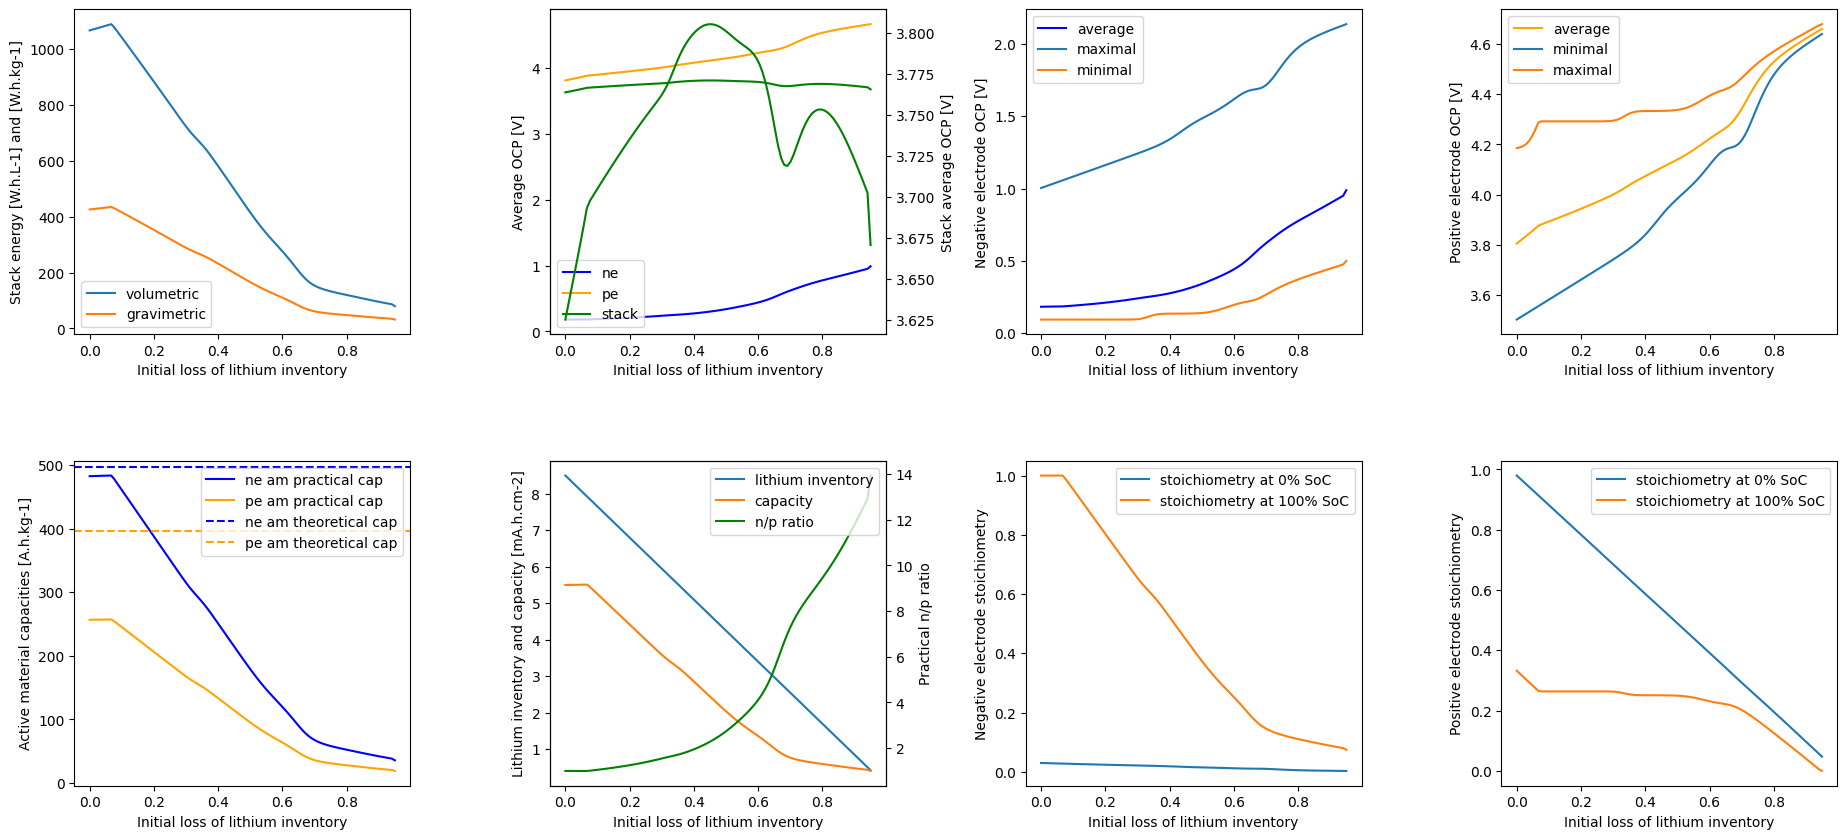

In [11]:
# initialize the active material concentrations to the zero in the negative electrode and to the maximum in the positive electrode
input["Initial concentration in negative electrode [mol.m-3]"] = None
input["Initial concentration in positive electrode [mol.m-3]"] = None

# generate an array of thicknesses from 10e-6 to 100e-6
initial_LLIs = np.linspace(0, 0.95, 100)

# initialize lists with energy densities and electrochemical data
stack_volumetric_energy = []
stack_gravimetric_energy = []
practical_n_p_ratios = []
lithium_inventories = []
capacities = []
stack_average_ocps = []
ne_average_ocp = []
pe_average_ocp = []
ne_stoichiometry_at_0_soc = []
ne_stoichiometry_at_100_soc = []
pe_stoichiometry_at_0_soc = []
pe_stoichiometry_at_100_soc = []
ne_practical_cap_am = []
pe_practical_cap_am = []

# loop over the initial LLI and save values
for initial_LLI in initial_LLIs:
    # update the upper voltage cut-off in the input
    input.update({"Initial loss of lithium inventory": initial_LLI})
    
    # create a TEA classes with the updated input
    tea_class = pybamm_tea.TEA(base, input)

    # save values in lists
    stack_volumetric_energy.append(tea_class.stack_energy.get("Volumetric stack energy [W.h.L-1]"))
    stack_gravimetric_energy.append(tea_class.stack_energy.get("Gravimetric stack energy [W.h.kg-1]"))
    practical_n_p_ratios.append(tea_class.stack_energy.get("Practical n/p ratio"))
    lithium_inventories.append(tea_class.stack_energy.get("Lithium inventory [mA.h.cm-2]"))
    capacities.append(tea_class.stack_energy.get("Capacity [mA.h.cm-2]"))
    stack_average_ocps.append(tea_class.stack_energy.get("Stack average OCP [V]"))
    ne_average_ocp.append(tea_class.stack_energy.get("Negative electrode average OCP [V]"))
    pe_average_ocp.append(tea_class.stack_energy.get("Positive electrode average OCP [V]"))
    ne_stoichiometry_at_0_soc.append(tea_class.stack_energy.get("Negative electrode stoichiometry at 0% SoC"))
    ne_stoichiometry_at_100_soc.append(tea_class.stack_energy.get("Negative electrode stoichiometry at 100% SoC"))
    pe_stoichiometry_at_0_soc.append(tea_class.stack_energy.get("Positive electrode stoichiometry at 0% SoC"))
    pe_stoichiometry_at_100_soc.append(tea_class.stack_energy.get("Positive electrode stoichiometry at 100% SoC"))
    ne_practical_cap_am.append(tea_class.stack_energy.get("Negative electrode active material practical capacity [A.h.kg-1]"))
    pe_practical_cap_am.append(tea_class.stack_energy.get("Positive electrode active material practical capacity [A.h.kg-1]"))

# create the figure and axes
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# add some padding between the subplots
fig.tight_layout(pad=7.0)

# plot the practical and theoretical active material capacities of the active materials
ne_theoretical_cap_am = tea_class.stack_energy.get("Negative electrode active material capacity [A.h.kg-1]")
pe_theoretical_cap_am = tea_class.stack_energy.get("Positive electrode active material capacity [A.h.kg-1]")
axs[1, 0].plot(initial_LLIs, ne_practical_cap_am, label="ne am practical cap", color="blue")
axs[1, 0].plot(initial_LLIs, pe_practical_cap_am, label="pe am practical cap", color="orange")
axs[1, 0].axhline(y=ne_theoretical_cap_am, label="ne am theoretical cap", color="blue", linestyle='dashed')
axs[1, 0].axhline(y=pe_theoretical_cap_am, label="pe am theoretical cap", color="orange", linestyle='dashed')
axs[1, 0].set_xlabel("Initial loss of lithium inventory")
axs[1, 0].set_ylabel("Active material capacities [A.h.kg-1]")
axs[1, 0].legend()

# plot the lithium inventory and capacity on the left y-axis and the n/p ratio on the right y-axis
axs[1, 1].plot(initial_LLIs, lithium_inventories, label="lithium inventory")
axs[1, 1].plot(initial_LLIs, capacities, label="capacity")
axs[1, 1].set_xlabel("Initial loss of lithium inventory")
axs[1, 1].set_ylabel("Lithium inventory and capacity [mA.h.cm-2]")
# create a second y-axis for the stack average OCP
ax_1_1 = axs[1, 1].twinx()
ax_1_1.plot(initial_LLIs, practical_n_p_ratios, label="n/p ratio", color="green")
ax_1_1.set_ylabel("Practical n/p ratio", color="black")
ax_1_1.tick_params(axis='y', labelcolor="black")
# create a combined legend for the two axes
lines_1_1_1, labels_1_1_1 = axs[1, 1].get_legend_handles_labels()
lines_1_1_2, labels_1_1_2 = ax_1_1.get_legend_handles_labels()
ax_1_1.legend(lines_1_1_1 + lines_1_1_2, labels_1_1_1 + labels_1_1_2, loc='upper right')

# plot the stoichiometries of the negative electrode
axs[1, 2].plot(initial_LLIs, ne_stoichiometry_at_0_soc, label="stoichiometry at 0% SoC")
axs[1, 2].plot(initial_LLIs, ne_stoichiometry_at_100_soc, label="stoichiometry at 100% SoC")
axs[1, 2].set_xlabel("Initial loss of lithium inventory")
axs[1, 2].set_ylabel("Negative electrode stoichiometry")
axs[1, 2].legend()

# plot the stoichiometries of the positive electrode
axs[1, 3].plot(initial_LLIs, pe_stoichiometry_at_0_soc, label="stoichiometry at 0% SoC")
axs[1, 3].plot(initial_LLIs, pe_stoichiometry_at_100_soc, label="stoichiometry at 100% SoC")
axs[1, 3].set_xlabel("Initial loss of lithium inventory")
axs[1, 3].set_ylabel("Positive electrode stoichiometry")
axs[1, 3].legend()

# plot the stack energy densities on the left y-axis and the n/p ratio on the right y-axis
axs[0, 0].plot(initial_LLIs, stack_volumetric_energy, label="volumetric")
axs[0, 0].plot(initial_LLIs, stack_gravimetric_energy, label="gravimetric")
axs[0, 0].set_xlabel("Initial loss of lithium inventory")
axs[0, 0].set_ylabel("Stack energy [W.h.L-1] and [W.h.kg-1]")
axs[0, 0].legend(loc='lower left')

# plot the minimal, maximal and average voltages of the negative electrode on the left y-axis
axs[0, 1].plot(initial_LLIs, ne_average_ocp, label="ne", color="blue")
axs[0, 1].plot(initial_LLIs, pe_average_ocp, label="pe", color="orange")
axs[0, 1].plot(initial_LLIs, stack_average_ocps, label="stack", color="green")
axs[0, 1].set_xlabel("Initial loss of lithium inventory")
axs[0, 1].set_ylabel("Average OCP [V]")
axs[0, 1].legend(loc='lower left')
# create a second y-axis for the stack average OCP
ax_0_1 = axs[0, 1].twinx()
ax_0_1.plot(initial_LLIs, stack_average_ocps, label="stack", color="green")
ax_0_1.set_ylabel("Stack average OCP [V]", color="black")
ax_0_1.tick_params(axis='y', labelcolor="black")

# plot the minimal, maximal and average voltages of the negative electrode on the left y-axis
axs[0, 2].plot(initial_LLIs, ne_average_ocp, label="average", color="blue")
axs[0, 2].plot(initial_LLIs, [np.squeeze(U_n(x).evaluate()) for x in ne_stoichiometry_at_0_soc], label="maximal")
axs[0, 2].plot(initial_LLIs, [np.squeeze(U_n(x).evaluate()) for x in ne_stoichiometry_at_100_soc], label="minimal")
axs[0, 2].set_xlabel("Initial loss of lithium inventory")
axs[0, 2].set_ylabel("Negative electrode OCP [V]")
axs[0, 2].legend()

# plot the minimal, maximal and average voltages of the positive electrode on the left y-axis
axs[0, 3].plot(initial_LLIs, pe_average_ocp, label="average", color="orange")
axs[0, 3].plot(initial_LLIs, [np.squeeze(U_p(x).evaluate()) for x in pe_stoichiometry_at_0_soc], label="minimal")
axs[0, 3].plot(initial_LLIs, [np.squeeze(U_p(x).evaluate()) for x in pe_stoichiometry_at_100_soc], label="maximal")
axs[0, 3].set_xlabel("Initial loss of lithium inventory")
axs[0, 3].set_ylabel("Positive electrode OCP [V]")
axs[0, 3].legend()

# show the figure
plt.show()